In [490]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt

In [491]:
online_cust_data = pd.read_csv("online_store_customer_data.csv")
print(online_cust_data.head())

  Transaction_date  Transaction_ID  Gender   Age Marital_status  State_names  \
0         1/1/2019          151200  Female  19.0         Single       Kansas   
1         1/1/2019          151201    Male  49.0         Single     Illinois   
2         1/1/2019          151202    Male  63.0        Married   New Mexico   
3         1/1/2019          151203     NaN  18.0         Single     Virginia   
4         1/1/2019          151204    Male  27.0         Single  Connecticut   

    Segment Employees_status Payment_method  Referal  Amount_spent  
0     Basic     Unemployment          Other      1.0       2051.36  
1     Basic    self-employed           Card      0.0        544.04  
2     Basic          workers         PayPal      1.0       1572.60  
3  Platinum          workers           Card      1.0       1199.79  
4     Basic    self-employed           Card      0.0           NaN  


In [492]:
print(online_cust_data['Payment_method'].unique())

['Other' 'Card' 'PayPal']


In [493]:
cust_data = pd.read_csv("customer_shopping_data.csv")
print(cust_data.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [494]:
# Assume all 'other' payment method purchases are quick checkout
quick_online_cust = online_cust_data.loc[online_cust_data['Payment_method']=='Other']
quick_online_cust.dropna(inplace=True)
print(quick_online_cust.head()) # 2044 rows

   Transaction_date  Transaction_ID  Gender   Age Marital_status State_names  \
0          1/1/2019          151200  Female  19.0         Single      Kansas   
11         1/5/2019          151211  Female  63.0        Married    Colorado   
14         1/5/2019          151214    Male  24.0        Married    Colorado   
15         1/6/2019          151215    Male  16.0         Single    New York   
18         1/7/2019          151218    Male  42.0        Married    Maryland   

     Segment Employees_status Payment_method  Referal  Amount_spent  
0      Basic     Unemployment          Other      1.0       2051.36  
11     Basic          workers          Other      1.0        154.31  
14  Platinum    self-employed          Other      1.0        954.12  
15  Platinum          workers          Other      1.0       1005.92  
18     Basic    self-employed          Other      0.0       1902.73  


<ipython-input-494-37fd1641852d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_online_cust.dropna(inplace=True)


In [495]:
# monthly gross revneue 
quick_online_cust['Month'] = pd.DatetimeIndex(quick_online_cust['Transaction_date']).month
quick_online_cust['Year'] = pd.DatetimeIndex(quick_online_cust['Transaction_date']).year
mrr_quick_cust = quick_online_cust[['Year', 'Month', 'Amount_spent']].groupby(['Year', 'Month']).sum()
mrr_quick_cust = mrr_quick_cust.reset_index()
mrr_quick_cust['Date'] = mrr_quick_cust['Month'].astype('str') + ',' + mrr_quick_cust['Year'].astype('str')
mrr_quick_cust['Date'] = pd.to_datetime(mrr_quick_cust['Date'], format='%m,%Y')
mrr_quick_cust['Date'] = mrr_quick_cust['Date'].dt.to_period('M')
print(mrr_quick_cust)

    Year  Month  Amount_spent     Date
0   2019      1      18719.68  2019-01
1   2019      2      19236.90  2019-02
2   2019      3      31934.27  2019-03
3   2019      4      26300.97  2019-04
4   2019      5      27934.44  2019-05
5   2019      6      21363.04  2019-06
6   2019      7      21002.55  2019-07
7   2019      8      25614.71  2019-08
8   2019      9       6916.75  2019-09
9   2019     10      36412.75  2019-10
10  2019     11      10832.07  2019-11
11  2019     12      26077.71  2019-12
12  2020      1      35819.37  2020-01
13  2020      2      37530.03  2020-02
14  2020      3      29715.23  2020-03
15  2020      4      20497.61  2020-04
16  2020      5      20575.20  2020-05
17  2020      6      41298.29  2020-06
18  2020      7      15259.47  2020-07
19  2020      8      34506.18  2020-08
20  2020      9      30616.73  2020-09
21  2020     10      25634.96  2020-10
22  2020     11      25139.00  2020-11
23  2020     12      31049.85  2020-12
24  2021      1      2898

<ipython-input-495-675f64eda4e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_online_cust['Month'] = pd.DatetimeIndex(quick_online_cust['Transaction_date']).month
<ipython-input-495-675f64eda4e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_online_cust['Year'] = pd.DatetimeIndex(quick_online_cust['Transaction_date']).year


In [496]:
# % of revenue per channel per month
# print(online_cust_data.head())
online_cust_data['Month'] = pd.DatetimeIndex(online_cust_data['Transaction_date']).month
online_cust_data['Year'] = pd.DatetimeIndex(online_cust_data['Transaction_date']).year
rev_per_channel = online_cust_data[['Year', 'Month', 'Payment_method', 'Amount_spent']].groupby(['Year', 'Month', 'Payment_method']).sum()
mth_rev_channel = online_cust_data[['Year', 'Month', 'Amount_spent']].groupby(['Year', 'Month']).sum()
rev_per_channel = rev_per_channel.reset_index()
mth_rev_channel = mth_rev_channel.reset_index()
mth_rev_channel.columns = ['Year', 'Month', 'Monthly_total']
perc_rev_channel = rev_per_channel.merge(mth_rev_channel, on=['Year', 'Month'])
perc_rev_channel['percent_rev'] = perc_rev_channel['Amount_spent'] / perc_rev_channel['Monthly_total']
print(perc_rev_channel.head(10))

   Year  Month Payment_method  Amount_spent  Monthly_total  percent_rev
0  2019      1           Card      41826.62      113882.32     0.367279
1  2019      1          Other      19448.46      113882.32     0.170777
2  2019      1         PayPal      52607.24      113882.32     0.461944
3  2019      2           Card      30229.75      106313.09     0.284346
4  2019      2          Other      20271.05      106313.09     0.190673
5  2019      2         PayPal      55812.29      106313.09     0.524980
6  2019      3           Card      35754.23      126771.31     0.282037
7  2019      3          Other      32239.34      126771.31     0.254311
8  2019      3         PayPal      58777.74      126771.31     0.463652
9  2019      4           Card      41814.48      136747.49     0.305779


In [497]:
perc_rev_channel['Date'] = perc_rev_channel['Month'].astype('str') + ',' + perc_rev_channel['Year'].astype('str')
perc_rev_channel['Date'] = pd.to_datetime(perc_rev_channel['Date'], format='%m,%Y')
perc_rev_channel['Date'] = perc_rev_channel['Date'].dt.to_period('M')

print(perc_rev_channel.head())

   Year  Month Payment_method  Amount_spent  Monthly_total  percent_rev  \
0  2019      1           Card      41826.62      113882.32     0.367279   
1  2019      1          Other      19448.46      113882.32     0.170777   
2  2019      1         PayPal      52607.24      113882.32     0.461944   
3  2019      2           Card      30229.75      106313.09     0.284346   
4  2019      2          Other      20271.05      106313.09     0.190673   

      Date  
0  2019-01  
1  2019-01  
2  2019-01  
3  2019-02  
4  2019-02  


<ipython-input-498-66a6bcfbf740>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("#1D428A")
<ipython-input-498-66a6bcfbf740>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['top'].set_color("#1D428A")
<ipython-input-498-66a6bcfbf740>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, 

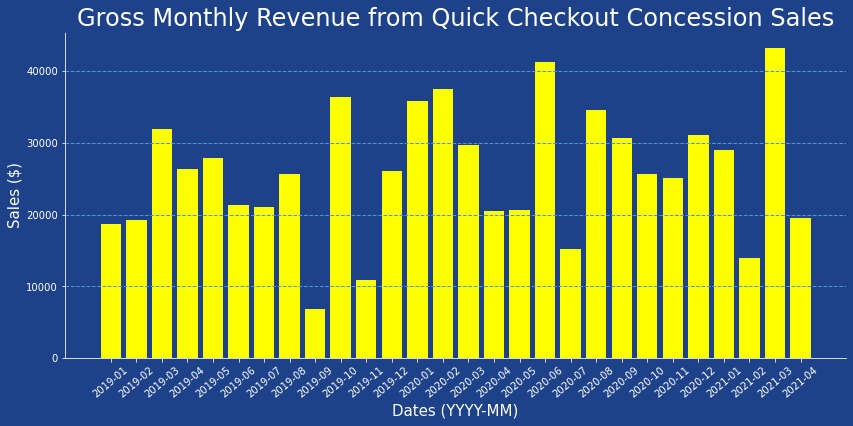

In [498]:
# plot findings - gross monthly revenue
plt.figure(figsize=(14,6), facecolor="#1D428A")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.axes().set_facecolor("#1D428A")
plt.axes().spines['top'].set_color("#1D428A")
plt.axes().spines['right'].set_color("#1D428A")
plt.xticks(rotation=40)
plt.xlabel('Dates (YYYY-MM)', fontsize=15, color='white')
plt.ylabel('Sales ($)', fontsize=15, color='white')
plt.title('Gross Monthly Revenue from Quick Checkout Concession Sales', fontsize=24, color='white')
plt.bar(mrr_quick_cust['Date'].astype('str'), mrr_quick_cust['Amount_spent'], color='yellow')
plt.grid(axis='y', linewidth=1, color="#5494DA", linestyle='--')
plt.show()

In [499]:
print(mrr_quick_cust[['Date', 'Amount_spent']])
print(mrr_quick_cust['Amount_spent'].mean())
print(mrr_quick_cust['Amount_spent'].std())

       Date  Amount_spent
0   2019-01      18719.68
1   2019-02      19236.90
2   2019-03      31934.27
3   2019-04      26300.97
4   2019-05      27934.44
5   2019-06      21363.04
6   2019-07      21002.55
7   2019-08      25614.71
8   2019-09       6916.75
9   2019-10      36412.75
10  2019-11      10832.07
11  2019-12      26077.71
12  2020-01      35819.37
13  2020-02      37530.03
14  2020-03      29715.23
15  2020-04      20497.61
16  2020-05      20575.20
17  2020-06      41298.29
18  2020-07      15259.47
19  2020-08      34506.18
20  2020-09      30616.73
21  2020-10      25634.96
22  2020-11      25139.00
23  2020-12      31049.85
24  2021-01      28985.80
25  2021-02      13967.32
26  2021-03      43238.10
27  2021-04      19553.89
25919.031071428566
8926.894727143714


In [500]:
mrr_quick_cust['std_dev'] = (mrr_quick_cust['Amount_spent'] - mrr_quick_cust['Amount_spent'].mean())/mrr_quick_cust['Amount_spent'].std()
print(mrr_quick_cust[['Date', 'Amount_spent', 'std_dev']])

       Date  Amount_spent   std_dev
0   2019-01      18719.68 -0.806479
1   2019-02      19236.90 -0.748539
2   2019-03      31934.27  0.673833
3   2019-04      26300.97  0.042785
4   2019-05      27934.44  0.225768
5   2019-06      21363.04 -0.510367
6   2019-07      21002.55 -0.550749
7   2019-08      25614.71 -0.034090
8   2019-09       6916.75 -2.128655
9   2019-10      36412.75  1.175517
10  2019-11      10832.07 -1.690057
11  2019-12      26077.71  0.017775
12  2020-01      35819.37  1.109046
13  2020-02      37530.03  1.300676
14  2020-03      29715.23  0.425254
15  2020-04      20497.61 -0.607313
16  2020-05      20575.20 -0.598621
17  2020-06      41298.29  1.722801
18  2020-07      15259.47 -1.194095
19  2020-08      34506.18  0.961941
20  2020-09      30616.73  0.526241
21  2020-10      25634.96 -0.031822
22  2020-11      25139.00 -0.087380
23  2020-12      31049.85  0.574760
24  2021-01      28985.80  0.343543
25  2021-02      13967.32 -1.338843
26  2021-03      43238.10  1

In [501]:
pivot = pd.pivot_table(data = perc_rev_channel[['Date', 'Payment_method', 'percent_rev']], index=['Date'], columns=['Payment_method'])
pivot.reset_index(inplace=True)
# pivot.rename(columns={'("Date", '')':'date', 'percent_rev, Card': "perc_rev_share_card", '(percent_rev, Other)': "perc_rev_share_other", '(percent_rev, PayPal)': 'perc_rev_share_paypal'}, inplace=True)
print(pivot.head())

                   Date percent_rev                    
Payment_method                 Card     Other    PayPal
0               2019-01    0.367279  0.170777  0.461944
1               2019-02    0.284346  0.190673  0.524980
2               2019-03    0.282037  0.254311  0.463652
3               2019-04    0.305779  0.202378  0.491843
4               2019-05    0.369675  0.222398  0.407927


In [502]:
pivot_reorder = pivot.iloc[:, [0,2,1,3]]
print(pivot_reorder.head())

TypeError: Invalid comparison between dtype=period[M] and int

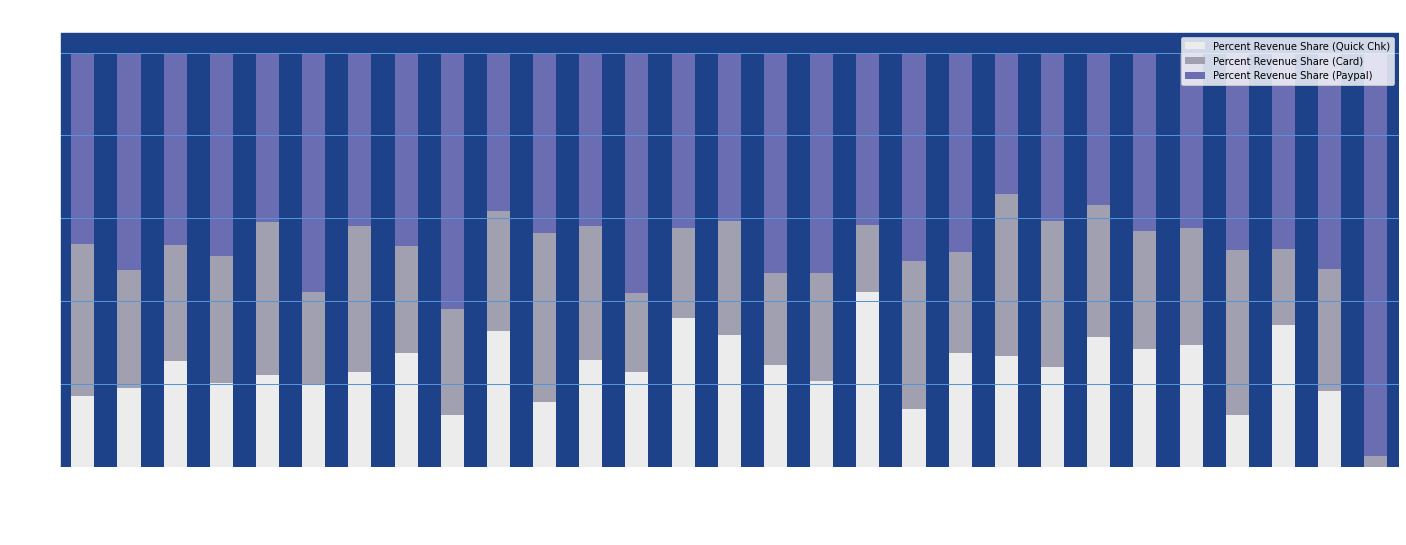

In [ ]:
# plot findings - % of revenue per channel per month
ax = pivot_reorder.plot.bar(x='Date', rot=40, stacked=True, figsize=(24,8), color=['#ECECEC', '#A0A0B0', '#6B6DB3'])
ax.tick_params(axis='x', colors='white', size=14)
ax.tick_params(axis='y', colors='white', size=14)
# ax.set_facecolor('#1D428A')
ax.axes.set_facecolor('#1D428A')
ax.set_xlabel('Dates (YYYY-MM)', fontsize=16, color='white')
ax.set_ylabel('Percent Revenue Share (%)', fontsize=16, color='white')
ax.set_title('Percent Revenue Share per Payment Method', fontsize=24, color='white')
ax.legend(['Percent Revenue Share (Quick Chk)', 'Percent Revenue Share (Card)', 'Percent Revenue Share (Paypal)'])
ax.grid(axis='y')

# plt.figure(figsize=(14,6), facecolor="#1D428A")
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.axes().set_facecolor("#1D428A")
# plt.axes().spines['top'].set_color("#1D428A")
# plt.axes().spines['right'].set_color("#1D428A")

In [ ]:
pivot_reorder.columns = pivot_reorder.columns.to_flat_index()
print(pivot_reorder.columns)
print(pivot_reorder[pivot_reorder['percent_rev', 'Other'] > 0.25])

Index([             ('Date', ''),  ('percent_rev', 'Other'),
         ('percent_rev', 'Card'), ('percent_rev', 'PayPal')],
      dtype='object')
   (Date, )  (percent_rev, Other)  (percent_rev, Card)  (percent_rev, PayPal)
2   2019-03              0.254311             0.282037               0.463652
7   2019-08              0.274045             0.259279               0.466676
9   2019-10              0.326787             0.290758               0.382455
11  2019-12              0.258168             0.322399               0.419433
13  2020-02              0.358334             0.218070               0.423597
14  2020-03              0.317804             0.275279               0.406917
17  2020-06              0.421828             0.162899               0.415273
19  2020-08              0.274357             0.243969               0.481674
20  2020-09              0.266803             0.390754               0.342443
22  2020-11              0.312550             0.319712               0.3677

In [ ]:
print(pivot_reorder[pivot_reorder['percent_rev', 'Other'] > 0.30])

   (Date, )  (percent_rev, Other)  (percent_rev, Card)  (percent_rev, PayPal)
9   2019-10              0.326787             0.290758               0.382455
13  2020-02              0.358334             0.218070               0.423597
14  2020-03              0.317804             0.275279               0.406917
17  2020-06              0.421828             0.162899               0.415273
22  2020-11              0.312550             0.319712               0.367738
26  2021-03              0.341378             0.184266               0.474356


In [ ]:
print(max(mrr_quick_cust['Amount_spent'] - min(mrr_quick_cust['Amount_spent'])))
print(max(mrr_quick_cust['Amount_spent']))
print(min(mrr_quick_cust['Amount_spent']))

36321.350000000006
43238.100000000006
6916.75


In [ ]:
import statistics as st
print(st.median(mrr_quick_cust['Amount_spent']))

25856.335


In [ ]:
# % of attendees purchasing food (assume 5 home games/month)

In [ ]:
# conversion rate of customers who leave their seats to buy food per game

In [ ]:
# average time taken foor food purchase per game per customer
# average game time missed due to food purchaases per customer

In [ ]:
# data spans from 2019 - 2021
test_df = pd.DatetimeIndex(online_cust_data['Transaction_date']).year
print(test_df)

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Transaction_date', length=2512)
